# Un modelo de regresión: Prediccioón del precio de un vehículo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv("C:/Users/alber/Escritorio/Machine Learning/datos/car_price.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data.shape

(11914, 16)

In [4]:
# Uniformizamos los nombres y respuestas del dataframe
# Los atributos que comiencen con minuscula y que no existan espacios entre los nombres
data.columns=data.columns.str.lower().str.replace(" ","_")

string_columns= list(data.dtypes[data.dtypes=="object"].index) # seleccionamos las variables object
for col in string_columns :
    data[col] = data[col].str.lower().str.replace(" ","_")

In [5]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [8]:
# Verificar que noe xistan datos faltantes en la variable de respuesta msrp, de ecistir habra que eliminarlos

# Creamos una variable que es la antiguedad del vehiculo
data["antiguedad"]=2017-data["year"]
del data["year"]
del data["market_category"]
data.head()

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,antiguedad
0,bmw,1_series_m,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135,6
1,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650,6
2,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350,6
3,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450,6
4,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500,6


In [9]:
# MAtriz de correlación

matriz_de_corr=data.corr(method="pearson")
matriz_de_corr

C:\Users\alber\AppData\Local\Temp\ipykernel_13092\2139364038.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_de_corr=data.corr(method="pearson")


,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,antiguedad
engine_hp,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008,-0.351794
engine_cylinders,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312,0.041479
number_of_doors,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635,-0.263787
highway_mpg,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043,-0.258240
city_mpg,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676,-0.198171
popularity,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476,-0.073049
msrp,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000,-0.227590
antiguedad,-0.351794,0.041479,-0.263787,-0.258240,-0.198171,-0.073049,-0.227590,1.000000


<AxesSubplot: >

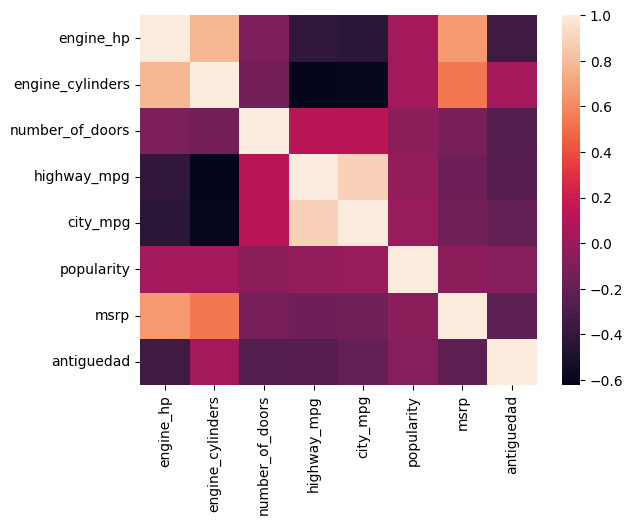

In [10]:
sns.heatmap(matriz_de_corr)

In [11]:
# Seleccionamos un conjunto de variables para construir nuestro primer modelo 
modelo1=["engine_hp","engine_cylinders","highway_mpg","city_mpg","antiguedad"]

# atributos
X=data[modelo1]
#target
Y=data.msrp

In [12]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [13]:
X_train.isna().sum()

engine_hp           53
engine_cylinders    24
highway_mpg          0
city_mpg             0
antiguedad           0
dtype: int64

In [14]:
# Resolvemos el problema de los datos faltantes
impute_estrategia=SimpleImputer(strategy="median")

# Entrenamos la técnica
impute_estrategia.fit(X_train)

# Aplicamos la técnica aprendida al conjunto de entrenamiento

X_train_completo=pd.DataFrame(impute_estrategia.transform(X_train),columns=X_train.columns)
X_train_completo

,engine_hp,engine_cylinders,highway_mpg,city_mpg,antiguedad
0,261.0,6.0,20.0,15.0,7.0
1,108.0,4.0,36.0,28.0,13.0
2,116.0,4.0,22.0,17.0,24.0
3,170.0,6.0,27.0,18.0,14.0
4,173.0,4.0,33.0,25.0,1.0
...,...,...,...,...,...
9526,305.0,4.0,23.0,17.0,0.0
9527,150.0,5.0,28.0,20.0,7.0
9528,155.0,4.0,26.0,21.0,11.0
9529,450.0,8.0,27.0,18.0,1.0


In [15]:
X_train_completo.isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
antiguedad          0
dtype: int64

In [16]:
# Definimos el modelo
Modelo=LinearRegression()

# Entrenamos el modelo en el conjunto de entrenamiento
Modelo.fit(X_train_completo,Y_train)

# Métricas en el conjunto de entrenamiento
print(f"Coeficiente de determinacion R^2: {Modelo.score(X_train_completo,Y_train)}")
print(f"Término independiente: {Modelo.intercept_}")

df_salida=pd.DataFrame()
df_salida["Atributo"]=X_train_completo.columns
df_salida["Coeficientes"]=Modelo.coef_
print(df_salida)

Coeficiente de determinacion R^2: 0.4417394931296572
Término independiente: -125965.70905617982
           Atributo  Coeficientes
0         engine_hp    328.839087
1  engine_cylinders   7406.824155
2       highway_mpg   1985.994269
3          city_mpg   -556.775938
4        antiguedad    201.702882


In [17]:
# Métricas de desempeño en el conjunto de prueba
# Aplicar la técnica de imputación de datos faltantes aprendida
X_test_completo=pd.DataFrame(impute_estrategia.transform(X_test),columns=X_test.columns)

# Métricas de desempeño
print(f"Coeficiente de determinacion R^2: {Modelo.score(X_test_completo,Y_test)}")
y_pred=Modelo.predict(X_test_completo)
print(f"Raiz del error cuadrático promedio: {np.sqrt(mean_squared_error(Y_test,y_pred)):.4f}")
print(f"Error absoluto promedio {mean_absolute_error(Y_test,y_pred):.4f}")

Coeficiente de determinacion R^2: 0.4961146188569787
Raiz del error cuadrático promedio: 33442.7116
Error absoluto promedio 20588.4086


In [18]:
from sklearn.pipeline import make_pipeline
# Vamos a realizar una validación cruzada de nuestro modelo, para tener una métrica mas estable del desempeño del modelo
modelo1=["engine_hp","engine_cylinders","highway_mpg","city_mpg","antiguedad"]
X=data[modelo1]
Y=data.msrp

# Creamos el pipeline para hacer la validación cruzada:
pipe=make_pipeline(SimpleImputer(strategy="median"), LinearRegression())

scores=cross_val_score(pipe,X,Y,cv=10)      # 10 valores del coeficiente de determinación
print(f"Coeficiente de determinación promedio R^2= {scores.mean():.4f}")
print(f"+/- {scores.std():.4f}")

Coeficiente de determinación promedio R^2= 0.4569
+/- 0.1336


In [19]:
scores

array([0.54537373, 0.53753473, 0.55229247, 0.41428293, 0.7200736 ,
       0.32807825, 0.50324512, 0.24580247, 0.39540971, 0.32738114])

In [20]:
# Creamos el pipeline para hacer la validación cruzada:
pipe=make_pipeline(SimpleImputer(strategy="median"), LinearRegression())
cv=RepeatedKFold(n_splits=10,n_repeats=50)
scores=cross_val_score(pipe,X,Y,cv=cv)      # 10 valores del coeficiente de determinación
print(f"Coeficiente de determinación promedio R^2= {scores.mean():.4f}")
print(f"+/- {scores.std():.4f}")

Coeficiente de determinación promedio R^2= 0.4713
+/- 0.0829


In [21]:
# Si incluimos en el preprocesamiento la estandarización de los atributos
# Creamos el pipeline para hacer la validación cruzada:

pipe=make_pipeline(SimpleImputer(strategy="median"),preprocessing.StandardScaler(), LinearRegression())
cv=RepeatedKFold(n_splits=10,n_repeats=5)
scores=cross_val_score(pipe,X,Y,cv=cv)      # 10 valores del coeficiente de determinación
print(f"Coeficiente de determinación promedio R^2= {scores.mean():.4f}")
print(f"+/- {scores.std():.4f}")

Coeficiente de determinación promedio R^2= 0.4746
+/- 0.0827


In [22]:
# Importancia de los atributos. Que atributo es mas importaante para predecir el precio del vehiculo?

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1234)

# Preprocesamiento
# 1.- Imputar los datos faltantes
impute_estrategia.fit(X_train)
X_train_completo=impute_estrategia.transform(X_train)
X_train_completo

# 2.- Normalizar los atributos
X_train_completo=pd.DataFrame(preprocessing.Normalizer().fit_transform(X_train_completo),columns=X_train.columns)
X_train_completo
modelo=LinearRegression()
modelo.fit(X_train_completo,Y_train)

# Métricas en el conjunto de entrenamiento
print(f"Coeficiente de determinacion R^2: {modelo.score(X_train_completo,Y_train)}")
print(f"Término independiente: {modelo.intercept_}")

df_salida=pd.DataFrame()
df_salida["Atributo"]=X_train_completo.columns
df_salida["Coeficientes"]=modelo.coef_
print(df_salida)

Coeficiente de determinacion R^2: 0.215749605887674
Término independiente: 1573139.3921684627
           Atributo  Coeficientes
0         engine_hp -1.440394e+06
1  engine_cylinders -1.186185e+06
2       highway_mpg -1.830868e+05
3          city_mpg -6.356712e+05
4        antiguedad -2.374344e+05


In [37]:
# Incluir variables categóricas
# Seleccionamos un conjunto de variables para construir nuestro primer modelo 
modelo2=["vehicle_size","engine_hp","engine_cylinders","highway_mpg","city_mpg","antiguedad"]

# atributos
X=data[modelo2]
#target
Y=data.msrp

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)
# Preprocesamos los datos

# 1.- Imputar los datos faltantes
# 2.- Crear las variables dummies para los atributos categóricos 

# _%_%_%_%_%_%_%_%%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_%_

# Resolvemos el problema de los datos faltantes
impute_estrategia=SimpleImputer(strategy="most_frequent")

# Entrenamos la técnica
impute_estrategia.fit(X_train)

# Aplicamos la técnica aprendida al conjunto de entrenamiento

X_train_completo=pd.DataFrame(impute_estrategia.transform(X_train),columns=X_train.columns)
X_train_completo

,vehicle_size,engine_hp,engine_cylinders,highway_mpg,city_mpg,antiguedad
0,compact,261.0,6.0,20,15,7
1,compact,108.0,4.0,36,28,13
2,compact,116.0,4.0,22,17,24
3,midsize,170.0,6.0,27,18,14
4,compact,173.0,4.0,33,25,1
...,...,...,...,...,...,...
9526,compact,305.0,4.0,23,17,0
9527,compact,150.0,5.0,28,20,7
9528,compact,155.0,4.0,26,21,11
9529,midsize,450.0,8.0,27,18,1


In [38]:
# Vamos a crear las variables dummies para la variable categórica

df_dummies=pd.get_dummies(X_train_completo["vehicle_size"],drop_first=True)
X_train_completo=pd.concat([X_train_completo,df_dummies],axis=1)
del X_train_completo["vehicle_size"]
X_train_completo

,engine_hp,engine_cylinders,highway_mpg,city_mpg,antiguedad,large,midsize
0,261.0,6.0,20,15,7,0,0
1,108.0,4.0,36,28,13,0,0
2,116.0,4.0,22,17,24,0,0
3,170.0,6.0,27,18,14,0,1
4,173.0,4.0,33,25,1,0,0
...,...,...,...,...,...,...,...
9526,305.0,4.0,23,17,0,0,0
9527,150.0,5.0,28,20,7,0,0
9528,155.0,4.0,26,21,11,0,0
9529,450.0,8.0,27,18,1,0,1


In [39]:
modelo=LinearRegression()
modelo.fit(X_train_completo,Y_train)

# Métricas en el conjunto de entrenamiento
print(f"Coeficiente de determinacion R^2: {modelo.score(X_train_completo,Y_train)}")
print(f"Término independiente: {modelo.intercept_}")

df_salida=pd.DataFrame()
df_salida["Atributo"]=X_train_completo.columns
df_salida["Coeficientes"]=modelo.coef_
print(df_salida)

Coeficiente de determinacion R^2: 0.4726273289717926
Término independiente: -129165.3347666079
           Atributo  Coeficientes
0         engine_hp    325.526748
1  engine_cylinders  10924.574593
2       highway_mpg   1856.559252
3          city_mpg   -413.132672
4        antiguedad    -16.836712
5             large -31948.339092
6           midsize -16839.212827


In [ ]:
# Un vehiculo grande es -31948 dolares mas barato que un vehiculo compacto (Vehículo compacto es la clase de referencia porque no aparece)
# y un vehiculo de tamaño mediano es -16839 dolares más barato que un vehículo compacto.